In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-env/requirements.txt
/kaggle/input/requirments2/requirements2.txt
/kaggle/input/jane-clean-priv/clean_data.parquet


In [1]:
!pip install -r /kaggle/input/requirments2/requirements2.txt




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.2 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement pywin32==308 (from versions: none)
ERROR: No matching distribution found for pywin32==308


In [2]:
import polars as pl
lazy_frame=pl.scan_parquet(r"/kaggle/input/jane-clean-priv")

#some preprocessing alread done reduced memory + skip first 500 dates and delete null columns
y = lazy_frame.select('responder_6').collect()
lazy_frame = lazy_frame.select([col for col in lazy_frame.columns if col != 'responder_6'])
weights= lazy_frame.select("weight")

print("done")
#df=pl.read_parquet(r"/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet")

done


/tmp/ipykernel_30/302229652.py:6: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  lazy_frame = lazy_frame.select([col for col in lazy_frame.columns if col != 'responder_6'])


In [2]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.7 MB/s eta 0:00:00a 0:00:01


In [23]:
print(y.shape)
y.head() # y our target variable is all ready to go

(39577181, 1)


shape: (5, 1)
┌─────────────┐
│ responder_6 │
│ ---         │
│ f32         │
╞═════════════╡
│ -0.310255   │
│ 0.369653    │
│ 0.776823    │
│ 0.082477    │
│ 0.66507     │
└─────────────┘

In [10]:
print(df.estimated_size("gb"))
17.0601749420166
print(df.shape)
df.head()

15.98888553865254
(47127338, 93)


shape: (5, 93)
┌─────────┬─────────┬───────────┬──────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ date_id ┆ time_id ┆ symbol_id ┆ weight   ┆ … ┆ responder_ ┆ responder_ ┆ responder_ ┆ partition_ │
│ ---     ┆ ---     ┆ ---       ┆ ---      ┆   ┆ 6          ┆ 7          ┆ 8          ┆ id         │
│ i16     ┆ i16     ┆ i8        ┆ f32      ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│         ┆         ┆           ┆          ┆   ┆ f32        ┆ f32        ┆ f32        ┆ i64        │
╞═════════╪═════════╪═══════════╪══════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 0       ┆ 0       ┆ 1         ┆ 3.889038 ┆ … ┆ 0.775981   ┆ 0.346999   ┆ 0.095504   ┆ 0          │
│ 0       ┆ 0       ┆ 7         ┆ 1.370613 ┆ … ┆ 0.703665   ┆ 0.216683   ┆ 0.778639   ┆ 0          │
│ 0       ┆ 0       ┆ 9         ┆ 2.285698 ┆ … ┆ 2.109352   ┆ 0.670881   ┆ 0.772828   ┆ 0          │
│ 0       ┆ 0       ┆ 10        ┆ 0.690606 ┆ … ┆ 1.114137   ┆ 0.775199   ┆ -1.379516  ┆ 0          │
│ 0       ┆ 0       ┆ 14        ┆ 0.44057  ┆ … ┆ -3.57282   ┆ -1.089123  ┆ -5.0       ┆ 0          │
└─────────┴─────────┴───────────┴──────────┴───┴────────────┴────────────┴────────────┴────────────┘

Above code sorted out our target and dataset Below code is setting up a normal data set for GBM eventually im just going to get all the data preprocessing done all in one file and upload it so code below right now is not that important as training will be done on a lean data set for now

In [3]:
from polars import col
import numpy as np
resps = df.select([col(f'responder_{i}') for i in range(1, 5)])
resps.head()
len_col=resps.height
print(len_col)
resps.head()
assert not np.any(np.isnan(resps)) and not np.any(np.isinf(resps)), "resps contains NaN or infinite values!"


NameError: name 'df' is not defined

In [4]:
import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the device being used
print(f"Using device: {device}")

Using device: cuda


In [5]:
torch.cuda.empty_cache()


Brownian motion will talk about more and add image

In [6]:
import numpy as np
import torch
from tqdm import tqdm

# Ensure that 'resps' is valid (no NaN or infinite values)
assert not np.any(np.isnan(resps)) and not np.any(np.isinf(resps)), "resps contains NaN or infinite values!"

def train_gbm(batch_size):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    # Initialize dT, sigma, and mu
    dT_init = np.ones(4-1).astype(float)
    sigma_init = np.random.randn(batch_size) * 0.01 + 1
    mu_param = torch.tensor(np.random.randn(batch_size) * 0.01, device=device).requires_grad_(True)
    
    with torch.no_grad():
        dT_param_log = torch.log(torch.tensor(dT_init + 1e-6)).to(device).requires_grad_(True)
        sigma_param_log = torch.log(torch.tensor(sigma_init + 1e-6)).to(device).requires_grad_(True)
    
    W = torch.tensor(resps.to_numpy() + 1, device=device).float()
    W = torch.clamp(W, min=1e-6)  # Ensure no zero or negative values

    W_init = torch.cat((torch.ones((W.size(0), 1)).to(device), W[:, :-1]), dim=1)
    W_init = torch.clamp(W_init, min=1e-6)  # Ensure no zero or negative values

    if torch.any(W <= 0) or torch.any(W_init <= 0):
        print(f"Warning: Found non-positive values in W or W_init: min(W)={W.min()}, min(W_init)={W_init.min()}")
    
    # Optimizer setup
    opt = torch.optim.Adam([dT_param_log, sigma_param_log, mu_param], lr=0.001)

    # Calculate the number of batches
    num_batches = len(resps) // batch_size

    for iteration in tqdm(range(4000)):
        opt.zero_grad()

        # Loop over mini-batches
        for batch_idx in range(num_batches):
            # Get the current batch data
            batch_start = batch_idx * batch_size
            batch_end = min((batch_idx + 1) * batch_size, len(resps))
            W_batch = W[batch_start:batch_end]
            W_init_batch = W_init[batch_start:batch_end]

            # Add the fixed 1 at the beginning of the time deltas
            dT_log = torch.cat([torch.zeros(1, device=device), dT_param_log])
            dT = torch.exp(dT_log).view((1, -1))
            sigmas = torch.exp(sigma_param_log).view((-1, 1))
            mus = mu_param.view((-1, 1))

            ln_W = torch.log(W_batch)
            ln_W_init = torch.log(W_init_batch)
            
            # Compute log probability
            log_prob = -ln_W - torch.log(sigmas) - 0.5 * torch.log(dT) - (ln_W - ln_W_init - (mus - 0.5 * sigmas**2) @ dT)**2 / (2 * sigmas**2 @ dT)
            
            row_likelihood = log_prob.sum(dim=1)
            total_likelihood = row_likelihood.mean(dim=0)
            
            negative_total_likelihood = -total_likelihood
            
            # Debugging step: Check if NaN values appear in the calculation
            if torch.isnan(negative_total_likelihood).any():
                print(f"NaN detected in negative_total_likelihood at iteration {iteration}")
            
            #if iteration % 1000 == 0:
                #print(f"Iteration {iteration}, Negative Total Likelihood: {negative_total_likelihood.item()}")
            if batch_idx == num_batches - 1  and iteration % 100 == 0: # Last mini-batch
                print(f"Iteration {iteration}, Negative Total Likelihood (last mini-batch): {negative_total_likelihood.item()}")
            
            negative_total_likelihood.backward()

        opt.step()

        # Debugging: Check for NaNs in updated parameters
        if torch.isnan(mu_param).any() or torch.isnan(sigma_param_log).any() or torch.isnan(dT_param_log).any():
            print(f"NaN detected in parameters at iteration {iteration}")
            break
    
    # After training, detach and return results
    mus = mu_param.detach().cpu().numpy()
    sigmas = torch.exp(sigma_param_log).detach().cpu().numpy()
    
    return mus, sigmas




In [7]:
import polars as pl
import os
from tqdm import tqdm

def train_gbm_full(df, batch_size):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    all_mus, all_sigmas = [], []

    for batch_start in range(0, len(df), batch_size):
        batch_end = min(batch_start + batch_size, len(df))
        resps_batch = resps[batch_start:batch_end]
        
        # Ensure batch data validity
        assert not np.any(np.isnan(resps_batch)) and not np.any(np.isinf(resps_batch)), "Batch contains NaN or infinite values!"
        
        # Call `train_gbm` with the current batch
        mus, sigmas = train_gbm(batch_size=len(resps_batch))
        all_mus.append(mus)
        all_sigmas.append(sigmas)
        results_df = pl.DataFrame({
        'mus': mus.flatten(),  # Flatten to ensure it's a 1D array
        'sigmas': sigmas.flatten(),
        })
        path=r"D:\jane-street-real-time-market-data-forecasting"
        file_name = f"gbm_augmented_training_data_batch_safe_{batch_start}.parquet"
        df.write_parquet(file_name)
        !ls /kaggle/working

    # Flatten and concatenate all results
    all_mus = np.concatenate(all_mus, axis=0)
    all_sigmas = np.concatenate(all_sigmas, axis=0)
    
    return all_mus, all_sigmas

# Call the modified function
mus, sigmas = train_gbm_full(resps, batch_size=13000000)



  0%|          | 1/4000 [00:00<47:08,  1.41it/s]

Iteration 0, Negative Total Likelihood (last mini-batch): 15.192374951040884


  3%|▎         | 101/4000 [00:31<19:59,  3.25it/s]

Iteration 100, Negative Total Likelihood (last mini-batch): 10.977711066048462


  5%|▌         | 201/4000 [01:02<19:29,  3.25it/s]

Iteration 200, Negative Total Likelihood (last mini-batch): 8.196219737650138


  8%|▊         | 301/4000 [01:33<18:59,  3.25it/s]

Iteration 300, Negative Total Likelihood (last mini-batch): 6.3022903858241


 10%|█         | 401/4000 [02:03<18:28,  3.25it/s]

Iteration 400, Negative Total Likelihood (last mini-batch): 4.966340131842988


 13%|█▎        | 501/4000 [02:34<18:00,  3.24it/s]

Iteration 500, Negative Total Likelihood (last mini-batch): 3.9804421217267216


 15%|█▌        | 601/4000 [03:05<17:28,  3.24it/s]

Iteration 600, Negative Total Likelihood (last mini-batch): 3.2213892810057336


 18%|█▊        | 701/4000 [03:36<16:58,  3.24it/s]

Iteration 700, Negative Total Likelihood (last mini-batch): 2.6203585396319102


 20%|██        | 801/4000 [04:07<16:27,  3.24it/s]

Iteration 800, Negative Total Likelihood (last mini-batch): 2.1358906595185476


 23%|██▎       | 901/4000 [04:38<15:55,  3.24it/s]

Iteration 900, Negative Total Likelihood (last mini-batch): 1.7403106568373476


 25%|██▌       | 1001/4000 [05:08<15:25,  3.24it/s]

Iteration 1000, Negative Total Likelihood (last mini-batch): 1.4140946089008937


 28%|██▊       | 1101/4000 [05:39<14:55,  3.24it/s]

Iteration 1100, Negative Total Likelihood (last mini-batch): 1.1429867167635996


 30%|███       | 1201/4000 [06:10<14:23,  3.24it/s]

Iteration 1200, Negative Total Likelihood (last mini-batch): 0.9162726207804682


 33%|███▎      | 1301/4000 [06:41<13:53,  3.24it/s]

Iteration 1300, Negative Total Likelihood (last mini-batch): 0.7256953807016477


 35%|███▌      | 1401/4000 [07:12<13:21,  3.24it/s]

Iteration 1400, Negative Total Likelihood (last mini-batch): 0.5647534641343299


 38%|███▊      | 1501/4000 [07:43<12:51,  3.24it/s]

Iteration 1500, Negative Total Likelihood (last mini-batch): 0.42823430537505547


 40%|████      | 1601/4000 [08:13<12:20,  3.24it/s]

Iteration 1600, Negative Total Likelihood (last mini-batch): 0.31189850305373795


 43%|████▎     | 1701/4000 [08:44<11:50,  3.24it/s]

Iteration 1700, Negative Total Likelihood (last mini-batch): 0.2122626553707299


 45%|████▌     | 1801/4000 [09:15<11:18,  3.24it/s]

Iteration 1800, Negative Total Likelihood (last mini-batch): 0.12644734618783834


 48%|████▊     | 1901/4000 [09:46<10:48,  3.24it/s]

Iteration 1900, Negative Total Likelihood (last mini-batch): 0.05206795745866191


 50%|█████     | 2001/4000 [10:17<10:16,  3.24it/s]

Iteration 2000, Negative Total Likelihood (last mini-batch): -0.01284679700304253


 53%|█████▎    | 2101/4000 [10:48<09:46,  3.24it/s]

Iteration 2100, Negative Total Likelihood (last mini-batch): -0.06991875299974096


 55%|█████▌    | 2201/4000 [11:19<09:15,  3.24it/s]

Iteration 2200, Negative Total Likelihood (last mini-batch): -0.1204731570370311


 58%|█████▊    | 2301/4000 [11:49<08:44,  3.24it/s]

Iteration 2300, Negative Total Likelihood (last mini-batch): -0.1655844636949174


 60%|██████    | 2401/4000 [12:20<08:13,  3.24it/s]

Iteration 2400, Negative Total Likelihood (last mini-batch): -0.2061171649189965


 63%|██████▎   | 2501/4000 [12:51<07:42,  3.24it/s]

Iteration 2500, Negative Total Likelihood (last mini-batch): -0.24276251029125281


 65%|██████▌   | 2601/4000 [13:22<07:11,  3.24it/s]

Iteration 2600, Negative Total Likelihood (last mini-batch): -0.27607126836071766


 68%|██████▊   | 2701/4000 [13:53<06:40,  3.24it/s]

Iteration 2700, Negative Total Likelihood (last mini-batch): -0.3064823899274926


 70%|███████   | 2801/4000 [14:24<06:09,  3.24it/s]

Iteration 2800, Negative Total Likelihood (last mini-batch): -0.3343474381972469


 73%|███████▎  | 2901/4000 [14:54<05:39,  3.24it/s]

Iteration 2900, Negative Total Likelihood (last mini-batch): -0.35995081555554687


 75%|███████▌  | 3001/4000 [15:25<05:08,  3.24it/s]

Iteration 3000, Negative Total Likelihood (last mini-batch): -0.3835260263974493


 78%|███████▊  | 3101/4000 [15:56<04:37,  3.24it/s]

Iteration 3100, Negative Total Likelihood (last mini-batch): -0.40526838952553546


 80%|████████  | 3201/4000 [16:27<04:06,  3.24it/s]

Iteration 3200, Negative Total Likelihood (last mini-batch): -0.42534471420601416


 83%|████████▎ | 3301/4000 [16:58<03:35,  3.24it/s]

Iteration 3300, Negative Total Likelihood (last mini-batch): -0.44390047926987497


 85%|████████▌ | 3401/4000 [17:29<03:04,  3.24it/s]

Iteration 3400, Negative Total Likelihood (last mini-batch): -0.46106502411132566


 88%|████████▊ | 3501/4000 [18:00<02:34,  3.24it/s]

Iteration 3500, Negative Total Likelihood (last mini-batch): -0.47695519918828144


 90%|█████████ | 3601/4000 [18:30<02:03,  3.24it/s]

Iteration 3600, Negative Total Likelihood (last mini-batch): -0.4916778520281666


 93%|█████████▎| 3701/4000 [19:01<01:32,  3.24it/s]

Iteration 3700, Negative Total Likelihood (last mini-batch): -0.5053314558724191


 95%|█████████▌| 3801/4000 [19:32<01:01,  3.24it/s]

Iteration 3800, Negative Total Likelihood (last mini-batch): -0.5180071235967038


 98%|█████████▊| 3901/4000 [20:03<00:30,  3.24it/s]

Iteration 3900, Negative Total Likelihood (last mini-batch): -0.5297892095520751


100%|██████████| 4000/4000 [20:33<00:00,  3.24it/s]


gbm_augmented_training_data_batch_safe_0.parquet


  0%|          | 1/4000 [00:00<20:41,  3.22it/s]

Iteration 0, Negative Total Likelihood (last mini-batch): 15.192233680215868


  3%|▎         | 101/4000 [00:31<19:59,  3.25it/s]

Iteration 100, Negative Total Likelihood (last mini-batch): 10.97761036354485


  5%|▌         | 201/4000 [01:01<19:32,  3.24it/s]

Iteration 200, Negative Total Likelihood (last mini-batch): 8.196141414169382


  8%|▊         | 301/4000 [01:32<19:00,  3.24it/s]

Iteration 300, Negative Total Likelihood (last mini-batch): 6.302226579162086


 10%|█         | 401/4000 [02:03<18:30,  3.24it/s]

Iteration 400, Negative Total Likelihood (last mini-batch): 4.966287105634986


 13%|█▎        | 501/4000 [02:34<17:58,  3.24it/s]

Iteration 500, Negative Total Likelihood (last mini-batch): 3.980397670814415


 15%|█▌        | 601/4000 [03:05<17:29,  3.24it/s]

Iteration 600, Negative Total Likelihood (last mini-batch): 3.221351757961171


 18%|█▊        | 701/4000 [03:36<16:56,  3.24it/s]

Iteration 700, Negative Total Likelihood (last mini-batch): 2.6203265853860223


 20%|██        | 801/4000 [04:06<16:27,  3.24it/s]

Iteration 800, Negative Total Likelihood (last mini-batch): 2.1358632823242956


 23%|██▎       | 901/4000 [04:37<15:55,  3.24it/s]

Iteration 900, Negative Total Likelihood (last mini-batch): 1.7402871895762593


 25%|██▌       | 1001/4000 [05:08<15:25,  3.24it/s]

Iteration 1000, Negative Total Likelihood (last mini-batch): 1.4140745824455527


 28%|██▊       | 1101/4000 [05:39<14:53,  3.24it/s]

Iteration 1100, Negative Total Likelihood (last mini-batch): 1.1429697657059104


 30%|███       | 1201/4000 [06:10<14:23,  3.24it/s]

Iteration 1200, Negative Total Likelihood (last mini-batch): 0.9162584297914622


 33%|███▎      | 1301/4000 [06:41<13:52,  3.24it/s]

Iteration 1300, Negative Total Likelihood (last mini-batch): 0.7256836532220866


 35%|███▌      | 1401/4000 [07:12<13:21,  3.24it/s]

Iteration 1400, Negative Total Likelihood (last mini-batch): 0.5647439139844486


 38%|███▊      | 1501/4000 [07:42<12:50,  3.24it/s]

Iteration 1500, Negative Total Likelihood (last mini-batch): 0.42822666675439613


 40%|████      | 1601/4000 [08:13<12:19,  3.24it/s]

Iteration 1600, Negative Total Likelihood (last mini-batch): 0.3118925479608112


 43%|████▎     | 1701/4000 [08:44<11:49,  3.24it/s]

Iteration 1700, Negative Total Likelihood (last mini-batch): 0.21225820750689536


 45%|████▌     | 1801/4000 [09:15<11:18,  3.24it/s]

Iteration 1800, Negative Total Likelihood (last mini-batch): 0.12644428449679262


 48%|████▊     | 1901/4000 [09:46<10:47,  3.24it/s]

Iteration 1900, Negative Total Likelihood (last mini-batch): 0.052066208061458265


 50%|█████     | 2001/4000 [10:17<10:16,  3.24it/s]

Iteration 2000, Negative Total Likelihood (last mini-batch): -0.012847277076941959


 53%|█████▎    | 2101/4000 [10:47<09:46,  3.24it/s]

Iteration 2100, Negative Total Likelihood (last mini-batch): -0.06991799478985412


 55%|█████▌    | 2201/4000 [11:18<09:14,  3.24it/s]

Iteration 2200, Negative Total Likelihood (last mini-batch): -0.12047119631574321


 58%|█████▊    | 2301/4000 [11:49<08:44,  3.24it/s]

Iteration 2300, Negative Total Likelihood (last mini-batch): -0.16558135224622347


 60%|██████    | 2401/4000 [12:20<08:12,  3.24it/s]

Iteration 2400, Negative Total Likelihood (last mini-batch): -0.20611297553688265


 63%|██████▎   | 2501/4000 [12:51<07:42,  3.24it/s]

Iteration 2500, Negative Total Likelihood (last mini-batch): -0.24275733623786028


 65%|██████▌   | 2601/4000 [13:22<07:11,  3.24it/s]

Iteration 2600, Negative Total Likelihood (last mini-batch): -0.2760652189105494


 68%|██████▊   | 2701/4000 [13:52<06:41,  3.24it/s]

Iteration 2700, Negative Total Likelihood (last mini-batch): -0.3064755838721616


 70%|███████   | 2801/4000 [14:23<06:09,  3.24it/s]

Iteration 2800, Negative Total Likelihood (last mini-batch): -0.33433999699258055


 73%|███████▎  | 2901/4000 [14:54<05:39,  3.24it/s]

Iteration 2900, Negative Total Likelihood (last mini-batch): -0.35994285734302056


 75%|███████▌  | 3001/4000 [15:25<05:08,  3.24it/s]

Iteration 3000, Negative Total Likelihood (last mini-batch): -0.3835176615851212


 78%|███████▊  | 3101/4000 [15:56<04:37,  3.24it/s]

Iteration 3100, Negative Total Likelihood (last mini-batch): -0.40525971810478933


 80%|████████  | 3201/4000 [16:27<04:06,  3.24it/s]

Iteration 3200, Negative Total Likelihood (last mini-batch): -0.4253358246030619


 83%|████████▎ | 3301/4000 [16:58<03:35,  3.24it/s]

Iteration 3300, Negative Total Likelihood (last mini-batch): -0.44389144832405303


 85%|████████▌ | 3401/4000 [17:28<03:04,  3.24it/s]

Iteration 3400, Negative Total Likelihood (last mini-batch): -0.4610559177246428


 88%|████████▊ | 3501/4000 [17:59<02:33,  3.24it/s]

Iteration 3500, Negative Total Likelihood (last mini-batch): -0.47694607325937755


 90%|█████████ | 3601/4000 [18:30<02:03,  3.24it/s]

Iteration 3600, Negative Total Likelihood (last mini-batch): -0.4916687534591485


 93%|█████████▎| 3701/4000 [19:01<01:31,  3.25it/s]

Iteration 3700, Negative Total Likelihood (last mini-batch): -0.5053224235843201


 95%|█████████▌| 3801/4000 [19:32<01:01,  3.25it/s]

Iteration 3800, Negative Total Likelihood (last mini-batch): -0.517998189526629


 98%|█████████▊| 3901/4000 [20:02<00:30,  3.25it/s]

Iteration 3900, Negative Total Likelihood (last mini-batch): -0.5297803937122032


100%|██████████| 4000/4000 [20:33<00:00,  3.24it/s]


gbm_augmented_training_data_batch_safe_0.parquet
gbm_augmented_training_data_batch_safe_13000000.parquet


  0%|          | 1/4000 [00:00<20:38,  3.23it/s]

Iteration 0, Negative Total Likelihood (last mini-batch): 15.192545457473814


  3%|▎         | 101/4000 [00:31<20:00,  3.25it/s]

Iteration 100, Negative Total Likelihood (last mini-batch): 10.977845492469333


  5%|▌         | 201/4000 [01:01<19:31,  3.24it/s]

Iteration 200, Negative Total Likelihood (last mini-batch): 8.196327644301109


  8%|▊         | 301/4000 [01:32<18:58,  3.25it/s]

Iteration 300, Negative Total Likelihood (last mini-batch): 6.302379276757016


 10%|█         | 401/4000 [02:03<18:28,  3.25it/s]

Iteration 400, Negative Total Likelihood (last mini-batch): 4.966413485668624


 13%|█▎        | 501/4000 [02:34<17:57,  3.25it/s]

Iteration 500, Negative Total Likelihood (last mini-batch): 3.9805033320510836


 15%|█▌        | 601/4000 [03:05<17:26,  3.25it/s]

Iteration 600, Negative Total Likelihood (last mini-batch): 3.2214416670834147


 18%|█▊        | 701/4000 [03:35<16:55,  3.25it/s]

Iteration 700, Negative Total Likelihood (last mini-batch): 2.6204045012625237


 20%|██        | 801/4000 [04:06<16:23,  3.25it/s]

Iteration 800, Negative Total Likelihood (last mini-batch): 2.1359318099522584


 23%|██▎       | 901/4000 [04:37<15:54,  3.25it/s]

Iteration 900, Negative Total Likelihood (last mini-batch): 1.7403480826348192


 25%|██▌       | 1001/4000 [05:08<15:22,  3.25it/s]

Iteration 1000, Negative Total Likelihood (last mini-batch): 1.4141290047803332


 28%|██▊       | 1101/4000 [05:38<14:51,  3.25it/s]

Iteration 1100, Negative Total Likelihood (last mini-batch): 1.1430184994727024


 30%|███       | 1201/4000 [06:09<14:20,  3.25it/s]

Iteration 1200, Negative Total Likelihood (last mini-batch): 0.916302034626812


 33%|███▎      | 1301/4000 [06:40<13:49,  3.25it/s]

Iteration 1300, Negative Total Likelihood (last mini-batch): 0.7257225806788145


 35%|███▌      | 1401/4000 [07:11<13:19,  3.25it/s]

Iteration 1400, Negative Total Likelihood (last mini-batch): 0.5647785752734407


 38%|███▊      | 1501/4000 [07:41<12:48,  3.25it/s]

Iteration 1500, Negative Total Likelihood (last mini-batch): 0.4282574590673107


 40%|████      | 1601/4000 [08:12<12:17,  3.25it/s]

Iteration 1600, Negative Total Likelihood (last mini-batch): 0.31191985301230535


 43%|████▎     | 1701/4000 [08:43<11:47,  3.25it/s]

Iteration 1700, Negative Total Likelihood (last mini-batch): 0.212282378719194


 45%|████▌     | 1801/4000 [09:14<11:17,  3.25it/s]

Iteration 1800, Negative Total Likelihood (last mini-batch): 0.1264656365510066


 48%|████▊     | 1901/4000 [09:45<10:45,  3.25it/s]

Iteration 1900, Negative Total Likelihood (last mini-batch): 0.052085015949548716


 50%|█████     | 2001/4000 [10:15<10:15,  3.25it/s]

Iteration 2000, Negative Total Likelihood (last mini-batch): -0.012830769695192723


 53%|█████▎    | 2101/4000 [10:46<09:44,  3.25it/s]

Iteration 2100, Negative Total Likelihood (last mini-batch): -0.06990356299733298


 55%|█████▌    | 2201/4000 [11:17<09:13,  3.25it/s]

Iteration 2200, Negative Total Likelihood (last mini-batch): -0.12045862314512781


 58%|█████▊    | 2301/4000 [11:48<08:42,  3.25it/s]

Iteration 2300, Negative Total Likelihood (last mini-batch): -0.16557042350201198


 60%|██████    | 2401/4000 [12:18<08:12,  3.25it/s]

Iteration 2400, Negative Total Likelihood (last mini-batch): -0.20610348072473786


 63%|██████▎   | 2501/4000 [12:49<07:41,  3.25it/s]

Iteration 2500, Negative Total Likelihood (last mini-batch): -0.24274907357819006


 65%|██████▌   | 2601/4000 [13:20<07:10,  3.25it/s]

Iteration 2600, Negative Total Likelihood (last mini-batch): -0.27605800156285365


 68%|██████▊   | 2701/4000 [13:51<06:39,  3.25it/s]

Iteration 2700, Negative Total Likelihood (last mini-batch): -0.3064692450498415


 70%|███████   | 2801/4000 [14:21<06:08,  3.25it/s]

Iteration 2800, Negative Total Likelihood (last mini-batch): -0.334334392804082


 73%|███████▎  | 2901/4000 [14:52<05:37,  3.25it/s]

Iteration 2900, Negative Total Likelihood (last mini-batch): -0.3599378672418412


 75%|███████▌  | 3001/4000 [15:23<05:07,  3.25it/s]

Iteration 3000, Negative Total Likelihood (last mini-batch): -0.38351318692392566


 78%|███████▊  | 3101/4000 [15:54<04:36,  3.25it/s]

Iteration 3100, Negative Total Likelihood (last mini-batch): -0.405255679488297


 80%|████████  | 3201/4000 [16:25<04:06,  3.25it/s]

Iteration 3200, Negative Total Likelihood (last mini-batch): -0.4253321586901457


 83%|████████▎ | 3301/4000 [16:55<03:35,  3.25it/s]

Iteration 3300, Negative Total Likelihood (last mini-batch): -0.44388810459522215


 85%|████████▌ | 3401/4000 [17:26<03:04,  3.25it/s]

Iteration 3400, Negative Total Likelihood (last mini-batch): -0.4610528555833739


 88%|████████▊ | 3501/4000 [17:57<02:33,  3.25it/s]

Iteration 3500, Negative Total Likelihood (last mini-batch): -0.47694325969264884


 90%|█████████ | 3601/4000 [18:28<02:02,  3.25it/s]

Iteration 3600, Negative Total Likelihood (last mini-batch): -0.4916661615284224


 93%|█████████▎| 3701/4000 [18:58<01:32,  3.25it/s]

Iteration 3700, Negative Total Likelihood (last mini-batch): -0.5053200301419507


 95%|█████████▌| 3801/4000 [19:29<01:01,  3.25it/s]

Iteration 3800, Negative Total Likelihood (last mini-batch): -0.5179959773947944


 98%|█████████▊| 3901/4000 [20:00<00:30,  3.25it/s]

Iteration 3900, Negative Total Likelihood (last mini-batch): -0.5297783469823609


100%|██████████| 4000/4000 [20:30<00:00,  3.25it/s]


gbm_augmented_training_data_batch_safe_0.parquet
gbm_augmented_training_data_batch_safe_13000000.parquet
gbm_augmented_training_data_batch_safe_26000000.parquet


  0%|          | 1/4000 [00:00<23:17,  2.86it/s]

Iteration 0, Negative Total Likelihood (last mini-batch): 8.894097236006488


  3%|▎         | 101/4000 [00:34<22:04,  2.94it/s]

Iteration 100, Negative Total Likelihood (last mini-batch): 7.066846255213192


  5%|▌         | 201/4000 [01:07<21:20,  2.97it/s]

Iteration 200, Negative Total Likelihood (last mini-batch): 5.959860214498984


  8%|▊         | 301/4000 [01:41<20:44,  2.97it/s]

Iteration 300, Negative Total Likelihood (last mini-batch): 5.268066068184963


 10%|█         | 401/4000 [02:15<20:18,  2.95it/s]

Iteration 400, Negative Total Likelihood (last mini-batch): 4.8233507987005195


 13%|█▎        | 501/4000 [02:49<19:49,  2.94it/s]

Iteration 500, Negative Total Likelihood (last mini-batch): 4.530904899876068


 15%|█▌        | 601/4000 [03:23<19:14,  2.94it/s]

Iteration 600, Negative Total Likelihood (last mini-batch): 4.334771108743373


 18%|█▊        | 701/4000 [03:57<18:31,  2.97it/s]

Iteration 700, Negative Total Likelihood (last mini-batch): 4.2008278004834505


 20%|██        | 801/4000 [04:31<18:02,  2.96it/s]

Iteration 800, Negative Total Likelihood (last mini-batch): 4.107798135162672


 23%|██▎       | 901/4000 [05:05<17:25,  2.96it/s]

Iteration 900, Negative Total Likelihood (last mini-batch): 4.042217284819636


 25%|██▌       | 1001/4000 [05:39<17:02,  2.93it/s]

Iteration 1000, Negative Total Likelihood (last mini-batch): 3.9954759806978637


 28%|██▊       | 1101/4000 [06:12<16:25,  2.94it/s]

Iteration 1100, Negative Total Likelihood (last mini-batch): 3.962018080187227


 30%|███       | 1201/4000 [06:46<15:46,  2.96it/s]

Iteration 1200, Negative Total Likelihood (last mini-batch): 3.938213390081018


 33%|███▎      | 1301/4000 [07:20<15:17,  2.94it/s]

Iteration 1300, Negative Total Likelihood (last mini-batch): 3.921642954194365


 35%|███▌      | 1401/4000 [07:54<14:43,  2.94it/s]

Iteration 1400, Negative Total Likelihood (last mini-batch): 3.9106447282128327


 38%|███▊      | 1501/4000 [08:28<14:03,  2.96it/s]

Iteration 1500, Negative Total Likelihood (last mini-batch): 3.904027122956057


 40%|████      | 1601/4000 [09:02<13:31,  2.96it/s]

Iteration 1600, Negative Total Likelihood (last mini-batch): 3.9008916135402516


 43%|████▎     | 1701/4000 [09:36<12:55,  2.96it/s]

Iteration 1700, Negative Total Likelihood (last mini-batch): 3.9005258293366016


 45%|████▌     | 1801/4000 [10:10<12:23,  2.96it/s]

Iteration 1800, Negative Total Likelihood (last mini-batch): 3.902341368762155


 48%|████▊     | 1901/4000 [10:43<11:50,  2.96it/s]

Iteration 1900, Negative Total Likelihood (last mini-batch): 3.905839103036354


 50%|█████     | 2001/4000 [11:17<11:17,  2.95it/s]

Iteration 2000, Negative Total Likelihood (last mini-batch): 3.9105905673890264


 53%|█████▎    | 2101/4000 [11:51<10:44,  2.94it/s]

Iteration 2100, Negative Total Likelihood (last mini-batch): 3.9162280968797285


 55%|█████▌    | 2201/4000 [12:25<10:10,  2.95it/s]

Iteration 2200, Negative Total Likelihood (last mini-batch): 3.9224391868216317


 58%|█████▊    | 2301/4000 [12:59<09:33,  2.96it/s]

Iteration 2300, Negative Total Likelihood (last mini-batch): 3.928962484703676


 60%|██████    | 2401/4000 [13:33<09:01,  2.95it/s]

Iteration 2400, Negative Total Likelihood (last mini-batch): 3.93558408473301


 63%|██████▎   | 2501/4000 [14:07<08:31,  2.93it/s]

Iteration 2500, Negative Total Likelihood (last mini-batch): 3.9421335745106303


 65%|██████▌   | 2601/4000 [14:40<07:53,  2.95it/s]

Iteration 2600, Negative Total Likelihood (last mini-batch): 3.948479718832566


 68%|██████▊   | 2701/4000 [15:14<07:18,  2.96it/s]

Iteration 2700, Negative Total Likelihood (last mini-batch): 3.9545258740463543


 70%|███████   | 2801/4000 [15:48<06:47,  2.94it/s]

Iteration 2800, Negative Total Likelihood (last mini-batch): 3.9602052975624584


 73%|███████▎  | 2901/4000 [16:22<06:12,  2.95it/s]

Iteration 2900, Negative Total Likelihood (last mini-batch): 3.9654765156370955


 75%|███████▌  | 3001/4000 [16:56<05:39,  2.94it/s]

Iteration 3000, Negative Total Likelihood (last mini-batch): 3.9703188807531986


 78%|███████▊  | 3101/4000 [17:30<05:02,  2.97it/s]

Iteration 3100, Negative Total Likelihood (last mini-batch): 3.9747284123596027


 80%|████████  | 3201/4000 [18:04<04:29,  2.97it/s]

Iteration 3200, Negative Total Likelihood (last mini-batch): 3.9787139830258687


 83%|████████▎ | 3301/4000 [18:37<03:55,  2.96it/s]

Iteration 3300, Negative Total Likelihood (last mini-batch): 3.982293889549333


 85%|████████▌ | 3401/4000 [19:11<03:23,  2.94it/s]

Iteration 3400, Negative Total Likelihood (last mini-batch): 3.985492833952288


 88%|████████▊ | 3501/4000 [19:45<02:48,  2.96it/s]

Iteration 3500, Negative Total Likelihood (last mini-batch): 3.988339329544581


 90%|█████████ | 3601/4000 [20:19<02:15,  2.94it/s]

Iteration 3600, Negative Total Likelihood (last mini-batch): 3.990863539174404


 93%|█████████▎| 3701/4000 [20:53<01:41,  2.94it/s]

Iteration 3700, Negative Total Likelihood (last mini-batch): 3.99309554410764


 95%|█████████▌| 3801/4000 [21:27<01:07,  2.94it/s]

Iteration 3800, Negative Total Likelihood (last mini-batch): 3.995064032071649


 98%|█████████▊| 3901/4000 [22:01<00:33,  2.96it/s]

Iteration 3900, Negative Total Likelihood (last mini-batch): 3.9967953811703367


100%|██████████| 4000/4000 [22:34<00:00,  2.95it/s]


gbm_augmented_training_data_batch_safe_0.parquet
gbm_augmented_training_data_batch_safe_13000000.parquet
gbm_augmented_training_data_batch_safe_26000000.parquet
gbm_augmented_training_data_batch_safe_39000000.parquet


In [8]:
# Ensure the final arrays match the length of the original DataFrame
assert len(mus) == len(df), "Mismatch in mus length!"
assert len(sigmas) == len(df), "Mismatch in sigmas length!"

# Add results to the original DataFrame
results_df = pl.DataFrame({
    'mus': mus.flatten(),  # Flatten to ensure it's a 1D array
    'sigmas': sigmas.flatten(),
})

assert len(df) == len(results_df), "Row count mismatch between original_df and results_df!"


In [9]:

df= df.with_columns([
    results_df['mus'],  # Add mus from results_df
    results_df['sigmas']  # Add sigmas from results_df
])
df.write_parquet("data_with_GBM_true")
!ls /kaggle/working

# Alternatively, you can insert them at specific positions if you need to
# final_df = original_df.insert_at_idx(idx, results_df['mus'])

# Print the concatenated DataFrame
df.head()

data_with_GBM
gbm_augmented_training_data_batch_safe_0.parquet
gbm_augmented_training_data_batch_safe_13000000.parquet
gbm_augmented_training_data_batch_safe_26000000.parquet
gbm_augmented_training_data_batch_safe_39000000.parquet


shape: (5, 55)
┌───────┬─────────┬─────────┬───────────┬───┬─────────────┬──────────────┬──────────┬──────────┐
│ index ┆ date_id ┆ time_id ┆ symbol_id ┆ … ┆ responder_8 ┆ partition_id ┆ mus      ┆ sigmas   │
│ ---   ┆ ---     ┆ ---     ┆ ---       ┆   ┆ ---         ┆ ---          ┆ ---      ┆ ---      │
│ u32   ┆ i16     ┆ i16     ┆ i8        ┆   ┆ f32         ┆ i8           ┆ f64      ┆ f64      │
╞═══════╪═════════╪═════════╪═══════════╪═══╪═════════════╪══════════════╪══════════╪══════════╡
│ 0     ┆ 500     ┆ 0       ┆ 1         ┆ … ┆ 0.286226    ┆ 2            ┆ 0.197659 ┆ 0.677686 │
│ 1     ┆ 500     ┆ 0       ┆ 2         ┆ … ┆ 0.424229    ┆ 2            ┆ 0.039092 ┆ 0.17127  │
│ 2     ┆ 500     ┆ 0       ┆ 3         ┆ … ┆ -0.480423   ┆ 2            ┆ 0.022386 ┆ 0.202336 │
│ 3     ┆ 500     ┆ 0       ┆ 5         ┆ … ┆ -0.93745    ┆ 2            ┆ 2.814211 ┆ 2.403637 │
│ 4     ┆ 500     ┆ 0       ┆ 7         ┆ … ┆ 1.543351    ┆ 2            ┆ 3.596194 ┆ 2.891145 │
└───────┴─────────┴─────────┴───────────┴───┴─────────────┴──────────────┴──────────┴──────────┘

In [ ]:
path=r"D:\jane-street-real-time-market-data-forecasting"
import os

# Define a specific file name
file_name = "gbm_augmented_training_data_2024-12-131.parquet"

# Combine the path and file name
file_path = os.path.join(path, file_name)

# Save the DataFrame as a Parquet file
df.write_parquet(file_path)

print(f"DataFrame saved to {file_path}")


Code below runs into memory issues 

In [2]:
df.shape[1]

53

In [3]:
import polars as pl

def standard_scale_all_columns(lazy_frame: pl.LazyFrame) -> pl.LazyFrame:
    """
    Apply standard scaling (z-score normalization) to all columns in a LazyFrame.
    Adds new columns with "_scaled" suffix and excludes the original columns.

    :param lazy_frame: Input Polars LazyFrame.
    :return: LazyFrame with only scaled columns.
    """
    scaled_columns = []

    # Iterate over all columns
    for column in lazy_frame.columns:
        # Calculate mean and standard deviation
        mean_value = lazy_frame.select(pl.col(column).mean()).collect().item()
        std_value = lazy_frame.select(pl.col(column).std()).collect().item()

        print(f"Scaling column: {column} | Mean: {mean_value} | Std: {std_value}")

        # Avoid scaling columns with zero standard deviation
        if std_value != 0:
            scaled_columns.append(
                ((pl.col(column) - mean_value) / std_value).alias(f"{column}_scaled")
            )
        else:
            print(f"Skipping column: {column} (Zero Std)")

    # Return the LazyFrame with only the scaled columns
    return lazy_frame.select(scaled_columns)

# Assuming `lazy_frame` is already defined
scaled_lazy_frame = standard_scale_all_columns(lazy_frame)

# Collect and inspect the result (use .collect() instead of .fetch())
scaled_df = scaled_lazy_frame.collect()

# Show the first 20 rows of the result
scaled_df.head(20)


/tmp/ipykernel_30/3775733350.py:14: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  for column in lazy_frame.columns:


Scaling column: index | Mean: 19788590.0 | Std: 11424948.196395837
Scaling column: date_id | Mean: 1144.6263971403118 | Std: 333.9367630202352
Scaling column: time_id | Mean: 477.2342533441177 | Std: 276.62488559910355
Scaling column: symbol_id | Mean: 18.78755407061458 | Std: 11.22116296721916
Scaling column: weight | Mean: 2.0404882431030273 | Std: 1.1429258584976196
Scaling column: feature_00 | Mean: 0.5996853709220886 | Std: 1.3447489738464355
Scaling column: feature_01 | Mean: 0.010678956285119057 | Std: 1.100235104560852
Scaling column: feature_02 | Mean: 0.5985499024391174 | Std: 1.33966863155365
Scaling column: feature_03 | Mean: 0.5982627868652344 | Std: 1.3397148847579956
Scaling column: feature_04 | Mean: 0.0006053933757357299 | Std: 1.04727303981781
Scaling column: feature_05 | Mean: -0.0492791123688221 | Std: 1.017353892326355
Scaling column: feature_06 | Mean: -0.0062563312239944935 | Std: 1.0708004236221313
Scaling column: feature_07 | Mean: -0.017733534798026085 | Std: 

shape: (20, 52)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ index_sca ┆ date_id_s ┆ time_id_s ┆ symbol_id ┆ … ┆ responder ┆ responder ┆ responder ┆ partitio │
│ led       ┆ caled     ┆ caled     ┆ _scaled   ┆   ┆ _5_scaled ┆ _7_scaled ┆ _8_scaled ┆ n_id_sca │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ led      │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f32       ┆ f32       ┆ f32       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ -1.732051 ┆ -1.930385 ┆ -1.725204 ┆ -1.585179 ┆ … ┆ -0.357371 ┆ -0.008936 ┆ 0.334888  ┆ -2.16747 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 1        │
│ -1.732051 ┆ -1.930385 ┆ -1.725204 ┆ -1.496062 ┆ … ┆ 0.561255  ┆ 0.899146  ┆ 0.495921  ┆ -2.16747 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 1        │
│ -1.732051 ┆ -1.930385 ┆ -1.725204 ┆ -1.406945 ┆ … ┆ -0.707985 ┆ 0.99108   ┆ -0.559691 ┆ -2.16747 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 1        │
│ -1.73205  ┆ -1.930385 ┆ -1.725204 ┆ -1.22871  ┆ … ┆ -0.517177 ┆ 0.864073  ┆ -1.09298  ┆ -2.16747 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 1        │
│ -1.73205  ┆ -1.930385 ┆ -1.725204 ┆ -1.050475 ┆ … ┆ 0.79786   ┆ 0.373539  ┆ 1.801789  ┆ -2.16747 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 1        │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ -1.732049 ┆ -1.930385 ┆ -1.725204 ┆ 0.018933  ┆ … ┆ -1.676524 ┆ 0.511835  ┆ -2.07771  ┆ -2.16747 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 1        │
│ -1.732049 ┆ -1.930385 ┆ -1.725204 ┆ 0.10805   ┆ … ┆ 0.617806  ┆ -0.595425 ┆ 5.835246  ┆ -2.16747 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 1        │
│ -1.732049 ┆ -1.930385 ┆ -1.725204 ┆ 0.197167  ┆ … ┆ 0.352572  ┆ -0.019968 ┆ 0.919907  ┆ -2.16747 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 1        │
│ -1.732049 ┆ -1.930385 ┆ -1.725204 ┆ 0.286285  ┆ … ┆ -2.709617 ┆ 0.012703  ┆ -3.583113 ┆ -2.16747 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 1        │
│ -1.732049 ┆ -1.930385 ┆ -1.725204 ┆ 0.375402  ┆ … ┆ 3.577767  ┆ 1.265357  ┆ 5.835246  ┆ -2.16747 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 1        │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [4]:
def reduce_mem_usage_pl(df, float16_as32=True):
    # Calculate initial memory usage in MB
    start_mem = df.estimated_size() / 1024**2
    print(f'Memory usage of dataframe is {start_mem:.2f} MB')
    
    for col in df.columns:
        col_type = df.schema[col]
        
        if col_type == pl.Int64 or col_type == pl.Float64:  # Process only numeric columns
            c_min, c_max = df.select(
                pl.col(col).min().alias(f"{col}_min"),
                pl.col(col).max().alias(f"{col}_max")
            ).row(0)
            
            # Handle integer types
            if col_type == pl.Int64:
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df = df.with_columns(pl.col(col).cast(pl.Int8))
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df = df.with_columns(pl.col(col).cast(pl.Int16))
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df = df.with_columns(pl.col(col).cast(pl.Int32))
            
            # Handle floating point types
            elif col_type == pl.Float64:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    if float16_as32:
                        df = df.with_columns(pl.col(col).cast(pl.Float32))
                    else:
                        df = df.with_columns(pl.col(col).cast(pl.Float16))
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df = df.with_columns(pl.col(col).cast(pl.Float32))

    # Calculate final memory usage in MB
    end_mem = df.estimated_size() / 1024**2
    print(f'Memory usage after optimization is: {end_mem:.2f} MB')
    print(f'Decreased by {(100 * (start_mem - end_mem) / start_mem):.1f}%')
    
    return df#memory_usage() is the memory usage of each column of df, sum is the sum of them, B->KB->MB
    
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype#type of column name
        if col_type != object and str(col_type)!='category':#Is not an object, which means that variables of numeric type are processed here
            c_min,c_max = df[col].min(),df[col].max()#Find the maximum and minimum values of this column
            if str(col_type)[:3] =='int':#If it is a variable of type int, whether it is int8, int16, int32 or int64
                #If the value range of this column is within the value range of int8, then convert the type (-128 to 127)
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                #If the value range of this column is within the value range of int16, then convert the type (-32,768 to 32,767)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                #If the value range of this column is within the value range of int32, then convert the type (-2,147,483,648 to 2,147,483,647)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                #If the value range of this column is within the value range of int64, then convert the type (-9,223,372,036,854,775,808 to 9,223,372,036,854,775,807)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:#If it is a floating-point number type.
                #If the value is within the range of float16, if you feel that you need higher precision, you can consider float32
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    if float16_as32:#If the data needs higher accuracy, you can choose float32
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float16)  
                #If the value is within the range of float32, type it
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                #If the value is within the range of float64, type it
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.estimated_size() / 1024**2
    print(f'Memory usage after optimization is: {end_mem:.2f} MB')
    print(f'Decreased by {(100 * (start_mem - end_mem) / start_mem):.1f}%')
    
    return df

In [5]:
import numpy as np
import gc
del lazy_frame
gc.collect() 
scaled_df=reduce_mem_usage_pl(scaled_df)

Memory usage of dataframe is 9058.50 MB
Memory usage after optimization is: 7850.70 MB
Decreased by 13.3%


Below code is setting up data as a tensor then passing to data loader which feeds the data to the model for training

When running the code below converting to tensors might be to much at once causing ram issues so should be done at diff intervals or a better option is just reading in the tensors from some files,everthing should be max 20g and 30 is avaible so should be no issue worried about training model however

In [6]:
import torch
import polars as pl
import time
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from torch import nn
import torch.optim as optim

#x_train = scaled_df.drop(['responder_6']) already done above
#y = df['responder_6'] should already be done above

y_tensor = torch.tensor(y.to_numpy(), dtype=torch.float32).view(-1, 1)  # Convert Polars Series to NumPy array
del y
time.sleep(10)
X_tensor = torch.tensor(scaled_df.to_numpy(), dtype=torch.float32)
#weights_tensor = torch.tensor(weights.to_numpy(), dtype=torch.float32).view(-1, 1)  # Convert weights to tensor
del scaled_df
time.sleep(10)
weights=weights.collect()
weights=torch.tensor(weights.to_numpy(), dtype=torch.float32).view(-1, 1)


# Assuming your data, targets, and weights are already loaded as tensors
dataset = TensorDataset(X_tensor, y_tensor, weights)


In [7]:
train_loader = DataLoader(dataset, batch_size=512, shuffle=True, num_workers=4, pin_memory=True)
print("done")

done


In [8]:
import torch
from torch.utils.tensorboard import SummaryWriter
import time
import psutil  # For monitoring system resources
import torch.cuda
writer = SummaryWriter(log_dir='runs/experiment_name')

# Define a helper function to get GPU memory usage
def get_gpu_usage():
    if torch.cuda.is_available():
        gpu_memory = torch.cuda.memory_allocated() / (1024 ** 3)  # In GB
        gpu_memory_max = torch.cuda.memory_reserved() / (1024 ** 3)  # Max GPU Memory in GB
        return gpu_memory, gpu_memory_max
    return 0, 0

# Define a helper function to estimate time remaining based on elapsed time
def get_time_left(start_time, epoch, total_epochs):
    elapsed_time = time.time() - start_time
    time_per_epoch = elapsed_time / (epoch + 1)
    time_left = time_per_epoch * (total_epochs - epoch - 1)
    return time_left
print("done")

done


In [8]:
# Building the Sequential neural network model
import tensorflow as tf 
import tensorflow as tf
import keras
from keras import layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    # Input layer
    Dense(256, activation='relu', input_shape=(52,)),  # 13,312 params
    
    # Hidden layers
    Dense(128, activation='relu'),  # 32,896 params
    Dense(64, activation='relu'),   # 8,320 params
    
    # Output layer
    Dense(1, activation='linear'),  # 65 params
])
import tensorflow as tf

class WeightedR2Score(tf.keras.metrics.Metric):
    def __init__(self, name='weighted_r2', **kwargs):
        super(WeightedR2Score, self).__init__(name=name, **kwargs)
        self.sum_squared_error = self.add_weight(name='sum_squared_error', initializer='zeros')
        self.sum_squared_total = self.add_weight(name='sum_squared_total', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, dtype=tf.float32)
        else:
            sample_weight = tf.ones_like(y_true, dtype=tf.float32)

        # Weighted squared error
        weighted_squared_error = sample_weight * tf.square(y_true - y_pred)

        # Weighted total squared error
        weighted_squared_total = sample_weight * tf.square(y_true - tf.reduce_mean(y_true))

        self.sum_squared_error.assign_add(tf.reduce_sum(weighted_squared_error))
        self.sum_squared_total.assign_add(tf.reduce_sum(weighted_squared_total))

    def result(self):
        # Calculate the weighted R2 score
        return 1 - (self.sum_squared_error / (self.sum_squared_total + tf.keras.backend.epsilon()))

    def reset_states(self):
        # Reset metrics for each epoch
        self.sum_squared_error.assign(0)
        self.sum_squared_total.assign(0)

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[WeightedR2Score()])

# Print model summary to verify parameter count
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │        13,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,785 (214.00 KB)

 Trainable params: 54,785 (214.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)


# Train with callbacks
history = model.fit(
    X_tensor, y_tensor,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop, reduce_lr],
    sample_weight=weights        
)

In [11]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, input_size=52):
        super(Model, self).__init__()
        
        # Define the layers
        self.layer1 = nn.Linear(input_size, 128)  # 52 -> 512
        self.layer2 = nn.Linear(128, 64)         # 512 -> 256
        self.layer3 = nn.Linear(64, 32)         # 256 -> 128
        self.layer4 = nn.Linear(32, 32)          # 128 -> 64
        self.layer5 = nn.Linear(32, 16)           # 64 -> 32
        self.output = nn.Linear(16, 1)            # 32 -> 1 (regression output)

        # Activation function (e.g., ReLU for non-linearity)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Forward pass through the network
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.relu(self.layer5(x))
        x = self.output(x)  # No activation for regression output
        return x



# Example usage
input_size = 52  # Number of features
time_steps = 30  # Number of time steps (sequence length)
batch_size = 2

# Create the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model_fake = Model(52)
model_fake.to(device)

print(model_fake)
# Create random input data (batch_size, time_steps, input_size)
x = torch.randn(batch_size, input_size).to(device)

# Forward pass
output = model_fake(x)
#print("Output Shape:", output)

total_params = sum(p.numel() for p in model_fake.parameters())  # Total number of parameters
trainable_params = sum(p.numel() for p in model_fake.parameters() if p.requires_grad)
non_trainable_params = total_params - trainable_params
print("params =",total_params)

cuda:0
Model(
  (layer1): Linear(in_features=52, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=32, bias=True)
  (layer5): Linear(in_features=32, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)
params = 18721


In [15]:
x = torch.rand(1000, 1000).to(device)
y = x @ x
print(y)

tensor([[244.1287, 245.9508, 246.5642,  ..., 246.9310, 237.3479, 246.9564],
        [255.0405, 254.1498, 260.1780,  ..., 262.6382, 249.7968, 260.3563],
        [238.4372, 248.4708, 241.8168,  ..., 246.4813, 229.0458, 246.9195],
        ...,
        [241.6371, 240.9976, 243.0908,  ..., 246.3490, 232.8204, 239.1022],
        [240.1937, 250.4379, 251.6259,  ..., 254.0502, 240.2887, 255.2505],
        [234.3555, 237.2531, 241.5095,  ..., 241.7802, 236.3195, 237.6935]],
       device='cuda:0')


In [16]:
import torch
import torch.nn as nn
import sys
from tqdm import tqdm

import torch.optim as optim
print(torch.version.cuda)  # CUDA version
print(torch.backends.cudnn.version())  
# Define model, criterion, optimizer
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model = Model(52)
model.to(device)


criterion = nn.MSELoss(reduction='none')  # Use MSE for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)
print ("done")

# Training loop
epochs = 20
total_steps = (39577181/ batch_size) * epochs
start_time = time.time()  # Track the start time for time left calculation
current_step = 0  # Initialize the step counter

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    running_r2 = 0.0

    
    counter=0
    for inputs, targets, weights in tqdm(train_loader, total=total_steps, desc="Training", unit="batch"):
        inputs, targets, weights = inputs.to(device), targets.to(device), weights.to(device)
   
        # Forward pass with mixed precision
        with torch.amp.autocast(device_type="cuda", enabled=torch.cuda.is_available()):
            outputs = model(inputs)
            loss = criterion(outputs[0], targets)
            weighted_loss = torch.sum(loss * weights)  # Calculating weighted loss
            

        # Backpropagation
        weighted_loss.backward()
        optimizer.step()
        running_loss += weighted_loss.item()
        current_step += 1
        progress = (current_step / total_steps) * 100

        avg_loss = running_loss / (len(X_tensor) // 64)
        counter+=1

        if counter % 2048 == 0:
            gpu_memory, gpu_memory_max = get_gpu_usage()
            
            elapsed_time = time.time() - start_time
            time_per_step = elapsed_time / current_step
            time_left = (total_steps - current_step) * time_per_step
            
            writer.add_scalar('Loss/train', epoch)
            writer.add_scalar('GPU Memory/allocated', gpu_memory, epoch)
            writer.add_scalar('GPU Memory/reserved', gpu_memory_max, epoch)
            sys.stdout.write(f'\rProgress: {progress:.2f}% , Loss: {avg_loss:.4f}, '
                         f'GPU Memory: {gpu_memory:.2f} GB / {gpu_memory_max:.2f} GB, '
                         f'Time left: {time_left:.2f} seconds')
            sys.stdout.flush()
    
    # Calculate the weighted R² score
    #r2 = weighted_r2_score(targets, outputs, weight)
    #running_r2 += r2.item()

avg_loss = running_loss / len(train_loader)
#avg_r2 = running_r2 / len(train_loader)
    
print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, ')#Weighted R²: {avg_r2:.4f}

    # Optionally, clear GPU memory (if required)
    # torch.cuda.empty_cache()
writer.close()

12.3
90000
cuda:0
done


Training:   0%|          | 2039/395771810.0 [00:19<789:25:54, 139.26batch/s] 

Progress: 0.00% , Loss: 2.6328, GPU Memory: 0.02 GB / 0.04 GB, Time left: 3715340.66 seconds

Training:   0%|          | 4077/395771810.0 [00:32<646:31:36, 170.04batch/s] 

Progress: 0.00% , Loss: 5.2755, GPU Memory: 0.02 GB / 0.04 GB, Time left: 3109115.98 seconds

Training:   0%|          | 6130/395771810.0 [00:44<651:04:56, 168.85batch/s]

Progress: 0.00% , Loss: nan, GPU Memory: 0.02 GB / 0.04 GB, Time left: 2851270.70 seconds

Training:   0%|          | 7317/395771810.0 [00:51<656:24:17, 167.48batch/s] Exception in thread Thread-9 (_pin_memory_loop):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/opt/conda/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/_utils/pin_memory.py", line 55, in _pin_memory_loop
    do_one_step()
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/_utils/pin_memory.py", line 32, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/opt/conda/lib/python3.10/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "/opt/conda/lib/python3.10/site-packages/torch/multiprocessing/reductions.py"

KeyboardInterrupt: 

In [21]:
x = torch.rand(10, 10).to("cuda")
y = torch.rand(10, 10).to("cuda")
z = torch.matmul(x, y)
print(z.device)  # Should print 'cuda:0'


cuda:0


In [ ]:
lags_ : pl.DataFrame | None = None


# Replace this function with your inference code.
# You can return either a Pandas or Polars dataframe, though Polars is recommended.
# Each batch of predictions (except the very first) must be returned within 1 minute of the batch features being provided.
def predict(test: pl.DataFrame, lags: pl.DataFrame | None) -> pl.DataFrame | pd.DataFrame:
    """Make a prediction."""
    # All the responders from the previous day are passed in at time_id == 0. We save them in a global variable for access at every time_id.
    # Use them as extra features, if you like.
    global lags_
    if lags is not None:
        lags_ = lags

    predictions = test.select(
        'row_id',
        pl.lit(0.0).alias('responder_6'),
    )

    # The predict function must return a DataFrame
    assert isinstance(predictions, pl.DataFrame | pd.DataFrame)
    # with columns 'row_id', 'responer_6'
    assert predictions.columns == ['row_id', 'responder_6']
    # and as many rows as the test data.
    assert len(predictions) == len(test)

    return predictions

NameError: name 'reduce_mem_usage_pl' is not defined

In [6]:
import gc
from sklearn.preprocessing import StandardScaler
x_train=df.drop(["responder_6"])
print("done")
y_train=df.select("responder_6")
weights=df.select(["weight"])
# Collect into memory only when needed
#x_train = x_train.collect()
#y_train = y_train
#weights = weights

# Garbage collection to free memory
del df
gc.collect()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

del x_train
# Collect garbage to free up memory
gc.collect()

print(x_train.shape)
y_train.head(20)

done


AttributeError: 'DataFrame' object has no attribute 'collect'

Below is the code for memory usage adapted from the notebook [https://www.kaggle.com/code/yuanzhezhou/jane-street-baseline-lgb-xgb-and-catboost] augmented for the polars dataframe settled on polars for its balance of effiency and usability, dask was the idea at first due to its parralized and out of memory nature which is optimal for large datasets however I found it hard to work with. 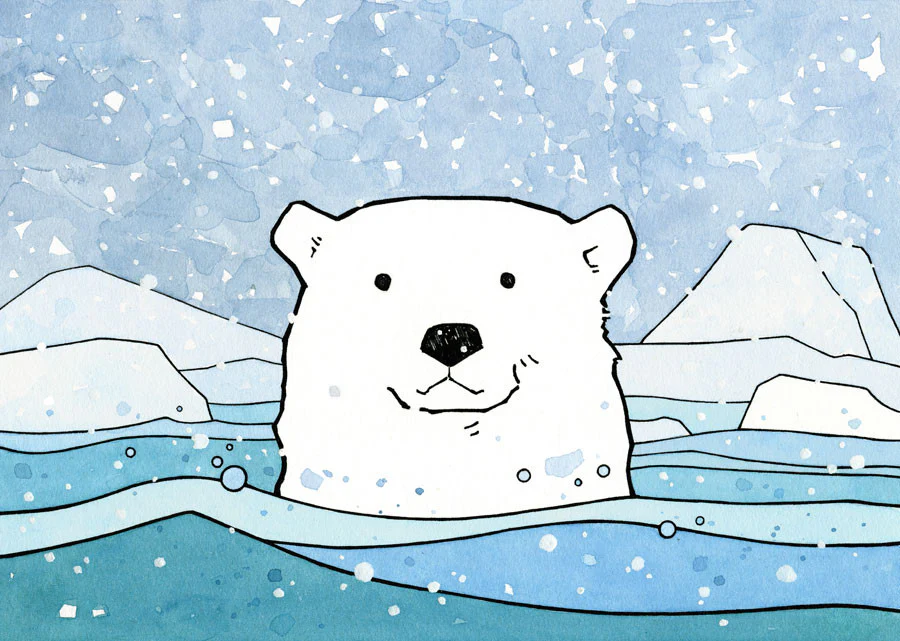
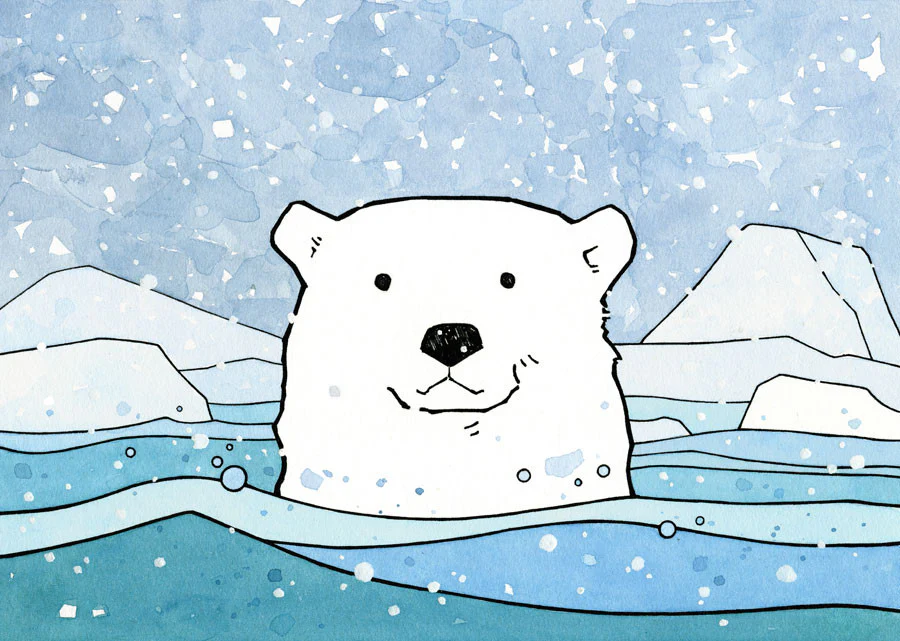
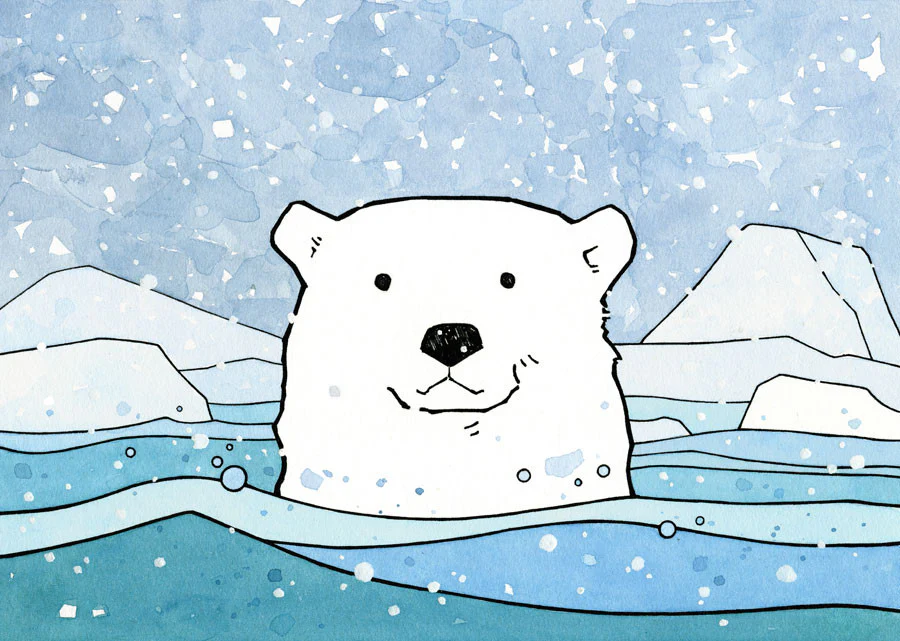
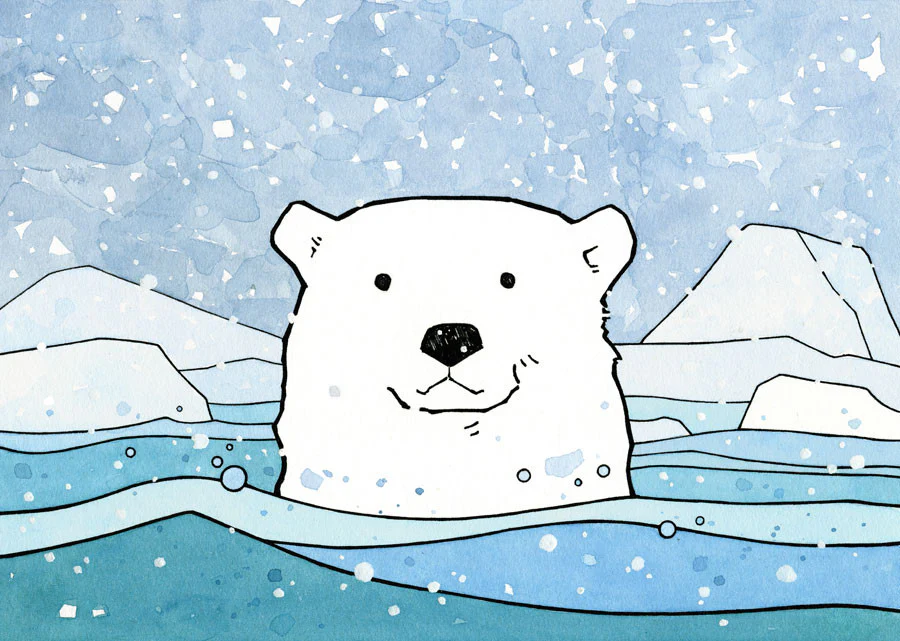